Neural Network based approach (Significant errors persist)

In [2]:
import numpy as np
import pandas as pd
import sklearn.datasets as skdata
import sklearn.metrics as skmetrics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import kl_div


from sklearn.neural_network import MLPClassifier

In [3]:
# MAKE SURE TO CHANGE THIS TO THE LOCAL PATH TO DATA
#TRAIN_PATH = "../augmented_train/reformatted_train_106800_samples.csv"
TRAIN_PATH = "../train_10000_samples_0_to_10_hz.csv"

data = pd.read_csv(TRAIN_PATH)

data_np = data.to_numpy()

print(data_np)
print(data_np.shape)

[[2165.875244140625 49192.8300358057 4950.520985686926 ...
  1.0998884090695715 -0.3377874641546745 'LRDA']
 [466.188720703125 34865.269945025444 5704.912146116356 ...
  -0.6758465848267224 -0.4742115666873585 'LPD']
 [196.77908325195312 18550.839977597818 3356.709263537125 ...
  0.7214381887485093 0.5082022822209593 'GPD']
 ...
 [14016254.0 1344455.0649087245 429328.468060573 ... -2.8103673961549203
  -2.122763833527274 'Seizure']
 [726.7728271484375 68503.0798098743 6331.501753051206 ...
  1.2531196335280073 -2.844648354805996 'Seizure']
 [484.8861083984375 48225.09995627403 8512.202587755772 ...
  -0.9684973867015032 -1.878838148097688 'Other']]
(9940, 2421)


In [4]:
num_input = data_np.shape[1] - 1

x = data_np[:, 0:num_input]
y = data_np[:, num_input]

# Shuffle the dataset based on sample indices
shuffled_indices = np.random.permutation(x.shape[0])

# Choose the first 80% as training set, next 10% as validation and the rest as testing
train_split_idx = int(0.80 * x.shape[0])
val_split_idx = int(0.90 * x.shape[0])

train_indices = shuffled_indices[0:train_split_idx]
val_indices = shuffled_indices[train_split_idx:val_split_idx]
test_indices = shuffled_indices[val_split_idx:]

# Select the examples from x and y to construct our training, validation, testing sets
x_train, y_train = x[train_indices, :], y[train_indices]
x_val, y_val = x[val_indices, :], y[val_indices]
x_test, y_test = x[test_indices, :], y[test_indices]

In [22]:
# Test out a number of models
models = []
val_scores = []

hidden_layer_sizes = [500, 100]
activation = 'relu'
solver = 'adam'
num_iterations = 350
iter = 50
alpha = 0.0001 # Strength of the regularization term
batch_size = 1000
learning_rate_init = 0.1

model = MLPClassifier(hidden_layer_sizes=(500, 100, 20))

model.fit(x_train, y_train)

models.append(model)

score_train = model.score(x_train, y_train)

score_val = model.score(x_val, y_val)

val_scores.append(score_val)

print('Solver: {}, Iterations: {}'.format(solver, iter))
print('Training accuracy: {:0.5f}%  Validation accuracy: {:0.2f}%'.format(score_train*100, score_val*100))

# Choose the best model based on highest validation accuracy
#print(val_scores)
best_model_idx = np.argmax(val_scores)
best_model = models[best_model_idx]


# Sanity check
#print('\nBest Penalty: {}'.format(penalties[best_model_idx // len(num_iterations)]))
#print('Best Iterations: {}'.format(num_iterations[best_model_idx % len(num_iterations)]))

# Best solver on the test set
predictions_test = model.predict(x_test)
score_test = model.score(x_test, y_test)

print("The test results.... {:0.2f}%".format(score_test*100))

c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Solver: adam, Iterations: 50
Training accuracy: 19.52968%  Validation accuracy: 19.72%
The test results.... 20.32%


Iteration 1: Train accuracy: 0.18109, Val accuracy: 0.17505
Iteration 2: Train accuracy: 0.15958, Val accuracy: 0.15292
Iteration 3: Train accuracy: 0.13556, Val accuracy: 0.14688
Iteration 4: Train accuracy: 0.19794, Val accuracy: 0.18511
Iteration 5: Train accuracy: 0.13556, Val accuracy: 0.14688


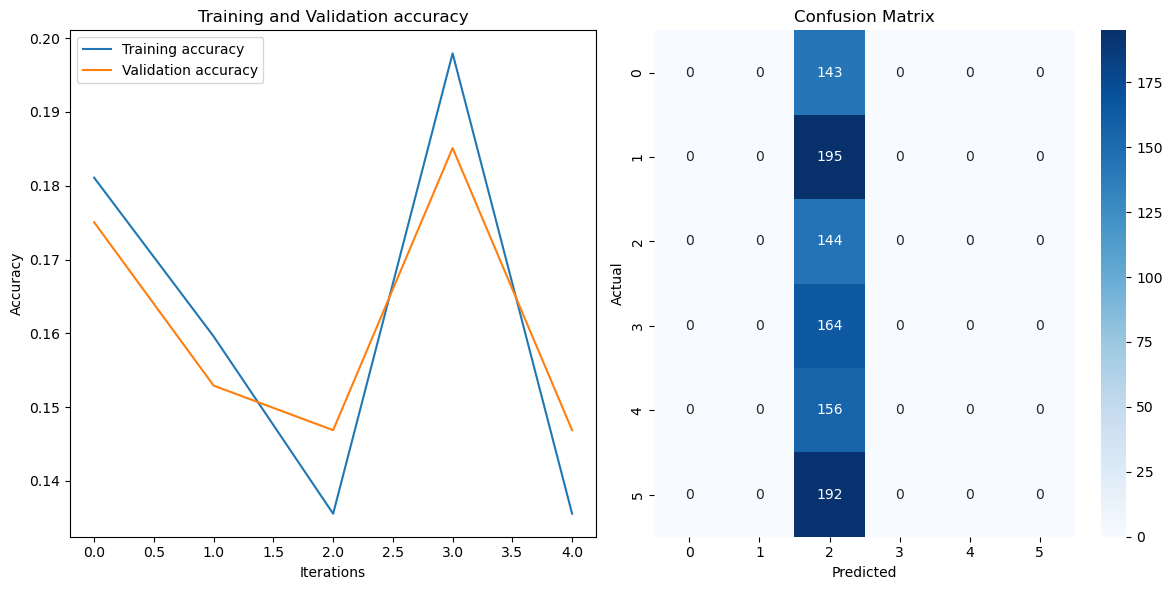

In [9]:
models = []
train_scores = []
val_scores = []

num_iterations = 5

for i in range(num_iterations):
    model = MLPClassifier(hidden_layer_sizes=(1000, 1000, 1000, 6), batch_size = 100, solver = 'adam')
    model.partial_fit(x_train, y_train, classes=np.unique(y_train))

    score_train = model.score(x_train, y_train)
    train_scores.append(score_train)

    score_val = model.score(x_val, y_val)
    val_scores.append(score_val)

    models.append(model)

    print(f"Iteration {i+1}: Train accuracy: {score_train:.5f}, Val accuracy: {score_val:.5f}")

predictions_test = model.predict(x_test)
score_test = model.score(x_test, y_test)

graph()


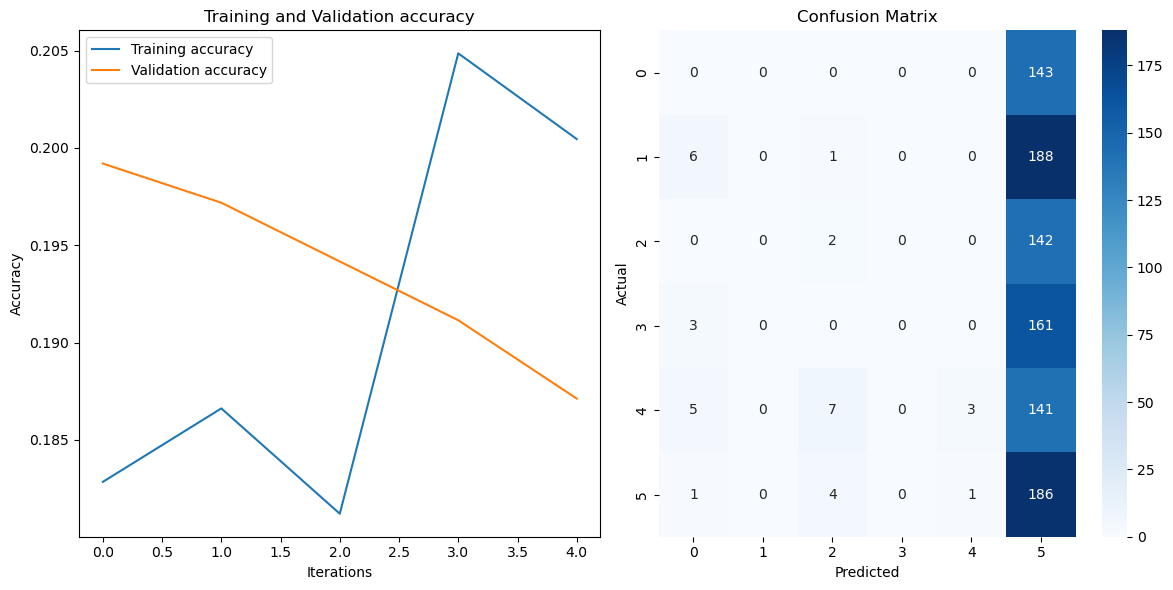

In [8]:
graph()

In [7]:
from sklearn.metrics import confusion_matrix

def graph():
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, predictions_test)
    # cm_train = confusion_matrix(y_train, predictions_train)

    # Plot the confusion matrix
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_scores, label='Training accuracy')
    plt.plot(val_scores, label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # plt.subplot(1, 2, 2)
    # sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
    # plt.title('Confusion Matrix')
    # plt.xlabel('Predicted')
    # plt.ylabel('Actual')

    plt.tight_layout()
    plt.show()



In [21]:
cm = skmetrics.confusion_matrix(y_test, predictions_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_test)
plt.title(all_sample_title, size = 15)

NameError: name 'predictions_test' is not defined

Text(0.5, 1.0, 'Accuracy Score: 0.193158953722334')

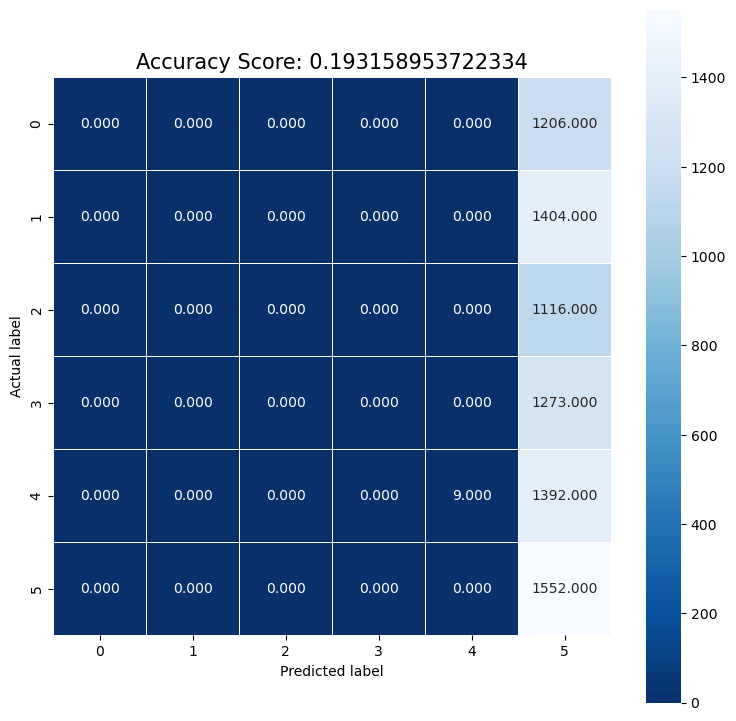

In [ ]:
predictions_train = model.predict(x_train)
cm = skmetrics.confusion_matrix(y_train, predictions_train)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_test)
plt.title(all_sample_title, size = 15)

In [ ]:
kullback_leibler_train = skmetrics.mutual_info_score(y_train, predictions_train)
kullback_leibler_test = skmetrics.mutual_info_score(y_test, predictions_test)

print(kullback_leibler_train)
print(kullback_leibler_test)

0.00196805959016263
0.0


In [ ]:
kl_test = kl_div()

TypeError: kl_div() takes from 2 to 3 positional arguments but 0 were given